In [1]:
from pandas import DataFrame
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import random
from scipy.stats import wilcoxon

In [2]:
loc = "/mnt/f/Datasets/CleanedDatasets2/Results_Other.xlsx"
wb = load_workbook(loc)
sheet = wb.active

In [3]:
headers = [sheet.cell(1, x).value.split(" ", 1)[1] for x in range(2, 18, 2)]
headers.append("Learning Based")
headers

['Eskin',
 'Gambaryan',
 'Goodall',
 'Lin',
 'Occurence Frequency',
 'Inverse Occurence Frequency',
 'Euclidian',
 'Manhattan',
 'Learning Based']

In [5]:
data = [[sheet.cell(y, x).value for y in range(2,31)] for x in range(3, 18, 2)]
data.append([0.9566994905,
0.4884400666,
0.6525660753,
0.926907599,
0.9353886843,
0.945910573,
0.9069463015,
0.6714044809,
0.5670365095,
0.6437994838,
0.338203758,
0.4083592594,
0.4059928656,
0.5114220381,
0.2943754792,
0.3979581892,
0.4172253013,
0.5566448569,
0.4551629126,
0.5562104583,
0.5360223055,
0.5547594428,
0.4666725099,
0.5604070425,
0.444272697,
0.2828712165,
0.522356689,
0.5395794511,
0.688572228])
df = pd.DataFrame(data, index=headers)

df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Eskin,0.792902,0.433592,0.512957,0.925732,0.929870,0.944737,0.907892,0.727323,0.564785,0.744626,...,0.285494,0.278817,0.295217,0.276331,0.287459,0.269005,0.203482,0.398933,0.279148,0.563615
Gambaryan,0.838084,0.488440,0.601749,0.936098,0.948797,0.959229,0.914341,0.574890,0.734113,0.543498,...,0.337921,0.336312,0.371852,0.335607,0.344157,0.327837,0.227831,0.371233,0.330495,0.592502
Goodall,0.593531,0.406724,0.674492,0.692900,0.700328,0.702558,0.683066,0.674584,0.542579,0.623955,...,0.281095,0.275141,0.276255,0.268285,0.274253,0.265182,0.203160,0.356061,0.271087,0.529939
Lin,0.509735,0.409312,0.512957,0.815893,0.821100,0.833117,0.914341,0.674492,0.542579,0.560440,...,0.275829,0.272868,0.284953,0.277471,0.265965,0.263383,0.194176,0.363453,0.266746,0.511838
Occurence Frequency,0.593531,0.420018,0.674492,0.899737,0.908328,0.916687,0.883892,0.607120,0.564090,0.752475,...,0.330426,0.324214,0.305031,0.281290,0.311096,0.282927,0.232254,0.435242,0.317543,0.551849
Inverse Occurence Frequency,0.509735,0.430053,0.512957,0.870479,0.873152,0.889620,0.860484,0.565139,0.509957,0.725275,...,0.346342,0.335830,0.378103,0.368277,0.362247,0.351287,0.219041,0.386555,0.340605,0.527278
Euclidian,0.593531,0.427456,0.674492,0.815893,0.821100,0.833117,0.803374,0.565139,0.632502,0.560440,...,0.311081,0.298242,0.309027,0.285457,0.311612,0.279873,0.208572,0.424387,0.306847,0.563615
Manhattan,0.689215,0.433592,0.601749,0.925732,0.929870,0.944737,0.907892,0.646085,0.564785,0.744626,...,0.313322,0.301284,0.294505,0.271777,0.298958,0.273271,0.234619,0.410304,0.302372,0.563615
Learning Based,0.956699,0.488440,0.652566,0.926908,0.935389,0.945911,0.906946,0.671404,0.567037,0.643799,...,0.556210,0.536022,0.554759,0.466673,0.560407,0.444273,0.282871,0.522357,0.539579,0.688572


In [6]:
plt.isinteractive()

True

In [7]:
means = df.mean(axis=1)
means

Eskin                          0.444320
Gambaryan                      0.474782
Goodall                        0.396875
Lin                            0.404594
Occurence Frequency            0.451452
Inverse Occurence Frequency    0.450423
Euclidian                      0.427404
Manhattan                      0.449898
Learning Based                 0.573523
dtype: float64

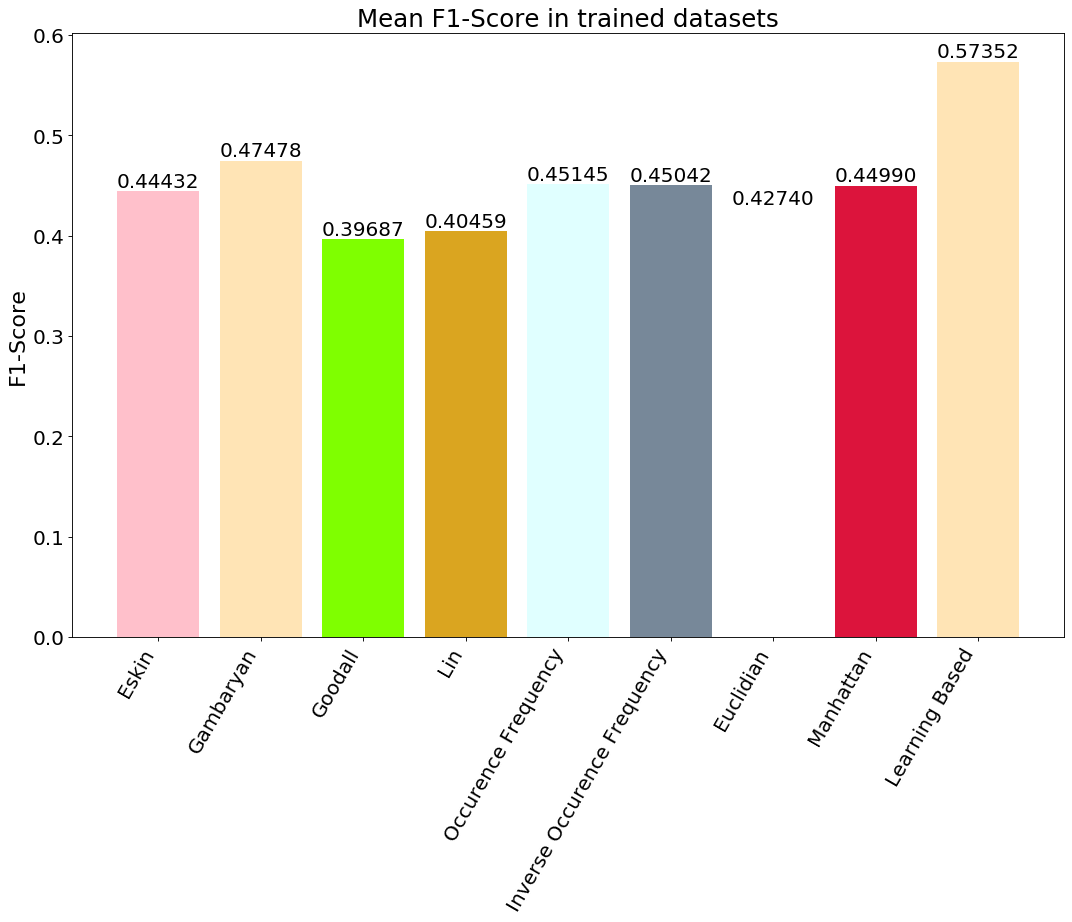

In [8]:
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(1000)
c = random.choices(all_colors, k=9)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(means.index, means, color=c, width=.8)
for i, val in enumerate(means.values):
    plt.text(i, val, "{0:.5f}".format(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':18})

# Decoration
plt.gca().set_xticklabels(df.index, rotation=60, horizontalalignment= 'right', fontdict={'fontweight':500, 'size':18})
for label in (plt.gca().get_yticklabels()):
    label.set_fontsize(18) # Size here overrides font_prop

plt.title("Mean F1-Score in trained datasets", fontsize=22)
plt.ylabel('F1-Score', fontsize=20)
#plt.ylim(0, 0.7)
plt.savefig("bars.png", transparent=True, bbox_inches="tight")
plt.show()

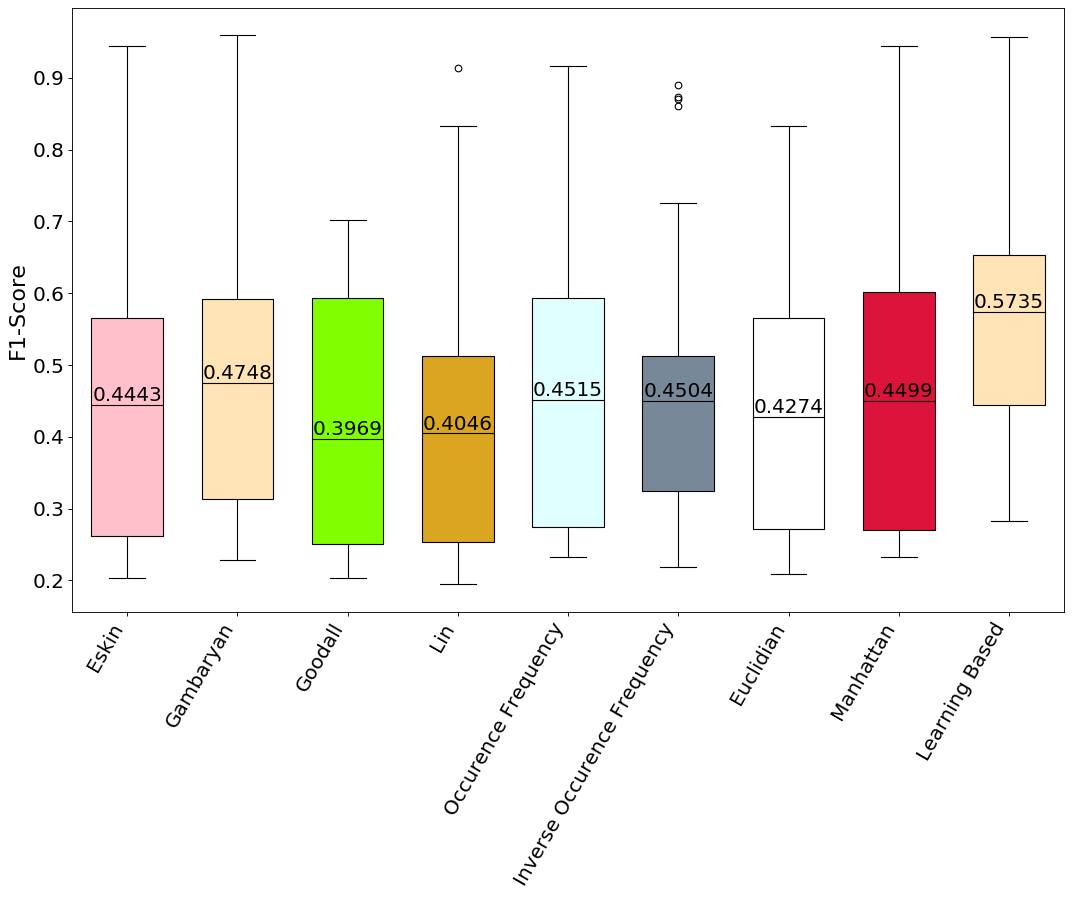

In [9]:
fig = plt.figure(figsize=(16,10), dpi= 80)
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
#box = df.boxplot(ax=ax)

bp = ax.boxplot(df, usermedians=means, autorange=True, widths=0.65, patch_artist=True)
ax.margins(y=0.05)

for label in (plt.gca().get_yticklabels()):
    label.set_fontsize(18) # Size here overrides font_prop
for i, box in enumerate(bp['boxes']):
    # change outline color
    #box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set_facecolor(c[i])
    pass
for median in bp['medians']:
    median.set(color='black')
    
for i, val in enumerate(means.values):
    plt.text(i+1, val, "{0:.4f}".format(val),horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':18})
    
plt.ylabel('F1-Score', fontsize=20)
plt.gca().set_xticklabels(df.index, rotation=60, horizontalalignment= 'right', fontdict={'fontweight':500, 'size':18})
plt.savefig("box.png", transparent=True, bbox_inches="tight")
plt.show()

In [10]:
ls = df.index.values.tolist()

pairs = []
for i in df.index:
    idx = ls.index(i) + 1
    for j in ls[idx:]:
        pairs.append((i,j))
pairs = []
for i in range(0,8):
    pairs.append(("Learning Based", ls[i]))
        
a = pd.DataFrame(index=df.index, columns=df.index)
        
for x, y in pairs:
    _, p = wilcoxon(df.loc[x], df.loc[y])
    if p < 0.05:
        best = x  if means[x] > means[y] else y
        #print(f"{x} and {y} are statistically different and the better is {best}")
        #print(f"{p}")
        print(f"LB vs {y} -> {p}")
        a[y][x] = best
    else:
        print(f"{x} and {y} are not different")
        a[y][x] = "None"

LB vs Eskin -> 1.6045133642722963e-05
LB vs Gambaryan -> 8.686999312548624e-05
LB vs Goodall -> 3.901655676493975e-06
LB vs Lin -> 3.5149630812742274e-06
LB vs Occurence Frequency -> 1.1939031151376057e-05
LB vs Inverse Occurence Frequency -> 6.5306818420991045e-06
LB vs Euclidian -> 4.3289405000320485e-06
LB vs Manhattan -> 8.847924025108336e-06


In [11]:
a

,Eskin,Gambaryan,Goodall,Lin,Occurence Frequency,Inverse Occurence Frequency,Euclidian,Manhattan,Learning Based
Eskin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gambaryan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goodall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occurence Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inverse Occurence Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Euclidian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Learning Based,Learning Based,Learning Based,Learning Based,Learning Based,Learning Based,Learning Based,Learning Based,Learning Based,NaN
